In [471]:
import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
from processed_data_class import processed_data_class as PDC
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [490]:
save_dir = '/reg/d/psdm/cxi/cxilv2718/results/data/'
calib_dir = '/reg/d/psdm/cxi/cxilv2718/results/calibrations/'

runs = (166,167,170,171,172,173,174,175,
        184,185,186,187,188,189,
        190,191,192,193,194,195,196,197,
        198,199,200,201,202,203,206,207)



# 48-59 FeII experiment runs full power, 3mm slit (also 63?)
# 67-70 H2O experiment runs full power, 3mm slit
# 44,71,88-90 are maps (no sample) - all the same, 3mm slit
# 72-74 different focus (-0.1, -0.2, -0.3)
# 78 new focus position: FeII 
# 79-80
# 81-87 different attenuation

# epix_roi= [90,140,190,300]   # up until run 97
# epix_roi= [90,150,195,290]   # up until run 159
epix_roi = [95,145,205,305] 

xrt_roi = [300,1100]
# calibration_file = 'calibration_2' # up until run 97
# calibration_file = 'calibration_3'
calibration_file = 'calibration_4'
# Processing or Loading
process_raw = False
on_off = False # Do you want to plot the raw data?


x_axis = 'energy' # 'pixels' or 'energy'
to_cal_file = [calib_dir, calibration_file]

In [491]:
# Energy Calibration, plot raw calibration runs with pixel axis and populate these arrays
save_cal = False
if save_cal is True:
    calib_runs = list(range(159,165))
    notch_energies = [7.05,7.055,7.06,7.065,7.07,7.075,7.08] # keV
    xrt_pixels =  [862,775,694,609,522,441,357] # enter 0 if you can't see the notch
    epix_pixels = [0,229,242,255,267,280,0] # enter 0 if you can't see the notch

    labels = ['notch_energies','xrt_pixels','epix_pixels','rois','to_cal_file','calib_runs']
    rois = [xrt_roi,epix_roi]
    calib_in = [labels, notch_energies,xrt_pixels,epix_pixels,rois,to_cal_file,calib_runs]
    calib_out = energy_calib.energy_calib(calib_in,save_cal)
    print('')
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]
if os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl') and save_cal is False:
    with open(to_cal_file[0] + to_cal_file[1] +'.pkl', "rb") as f:
        calib_out = pickle.load(f)
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]   
    
if not os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl'):
    print(to_cal_file[1] + ' does not exist.')
    print('No calibration file loaded.')

The loaded calibration settings are: 
notch_energies : [7.05, 7.055, 7.06, 7.065, 7.07, 7.075, 7.08]
xrt_pixels : [862, 775, 694, 609, 522, 441, 357]
epix_pixels : [0, 229, 242, 255, 267, 280, 0]
rois : [[300, 1100], [95, 145, 205, 305]]
to_cal_file : ['/reg/d/psdm/cxi/cxilv2718/results/calibrations/', 'calibration_4']
epix_motor : 23.237
time_calibrated : 2021-05-31 04:51:01.066290


In [492]:
# Raw Data
plot_one = 171
plot_one_idx = np.searchsorted(runs,plot_one)
raw_datas = []
for run in runs:
    scan_name = 'run_' + str(run)
    ds_string = 'exp=cxilv2718:run='+str(run)+':smd'
    print(ds_string)
    if process_raw:
        raw_data = load_data.load_data(save_dir,scan_name,ds_string,epix_roi,xrt_roi)
    else:
        if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
            with open(save_dir + scan_name + "/" + "rawdata.pkl", "rb") as f:
                raw_data = pickle.load(f)
        else:
            print('You are trying to load a file that does not exist.')
    if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
        raw_datas = raw_datas + [raw_data]

[load_data.add_cal_info(raw_datas[i],to_cal_file) for i in range(0,len(raw_datas))]
plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)

# plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)
# plt.figure()
# [plt.plot(raw_datas[i].epix_energy_windowed,np.mean(raw_datas[i].epix_windowed,0),label=raw_datas[i].scan_name) for i in range(0,len(runs))]
# # [plt.plot(raw_datas[i].xrt_energy_windowed,np.mean(raw_datas[i].xrt_windowed,0),label=raw_datas[i].scan_name) for i in range(0,len(runs))]

# plt.legend()
# plt.xlabel('energy,keV')
# # plt.title('XRT Spectra Stacked')
# plt.title('Epix Spectra Stacked')
# plt.show()

exp=cxilv2718:run=166:smd
exp=cxilv2718:run=167:smd
exp=cxilv2718:run=170:smd
exp=cxilv2718:run=171:smd
exp=cxilv2718:run=172:smd
exp=cxilv2718:run=173:smd
exp=cxilv2718:run=174:smd
exp=cxilv2718:run=175:smd
exp=cxilv2718:run=184:smd
exp=cxilv2718:run=185:smd
exp=cxilv2718:run=186:smd
exp=cxilv2718:run=187:smd
exp=cxilv2718:run=188:smd
exp=cxilv2718:run=189:smd
exp=cxilv2718:run=190:smd
exp=cxilv2718:run=191:smd
exp=cxilv2718:run=192:smd
exp=cxilv2718:run=193:smd
exp=cxilv2718:run=194:smd
exp=cxilv2718:run=195:smd
exp=cxilv2718:run=196:smd
exp=cxilv2718:run=197:smd
exp=cxilv2718:run=198:smd
exp=cxilv2718:run=199:smd
exp=cxilv2718:run=200:smd
exp=cxilv2718:run=201:smd
exp=cxilv2718:run=202:smd
exp=cxilv2718:run=203:smd
exp=cxilv2718:run=206:smd
exp=cxilv2718:run=207:smd
Raw Data plotting is turned off.


In [493]:
# Applies an energy window to both spectra. Decide on window based on epix spectrum above.
# Also, reduces the resolution of the xrt spectrometer to match that of the epix.
energy_window = [7.051,7.07785]
for i in range(0,len(raw_datas)):
#     if hasattr(raw_datas[i],'epix_energy_windowed'): #this if statement must be commented out for the windowing to happen
#         continue
    reduce_xrt_res.apply_window(raw_datas[i],energy_window)
    reduce_xrt_res.reduce_res(raw_datas[i])


# plt.figure()
# plt.plot(raw_data.epix_energy_windowed,np.sum(raw_data.xrt_red_res,0))
# plt.plot(raw_data.xrt_energy_windowed,np.sum(raw_data.xrt_windowed,0),alpha=0.5)
# plt.show()

Filter info for run_166:

Bounds filters removed 4350 shots out of 33583 total shots.
Linearity filters removed 981 shots out of 33583 total shots.
The combined filters removed 5331 shots out of 33583 total shots | 15.874 %

Filter info for run_167:

Bounds filters removed 3665 shots out of 33753 total shots.
Linearity filters removed 959 shots out of 33753 total shots.
The combined filters removed 4624 shots out of 33753 total shots | 13.7 %

Filter info for run_170:

Bounds filters removed 3936 shots out of 36952 total shots.
Linearity filters removed 4113 shots out of 36952 total shots.
The combined filters removed 8049 shots out of 36952 total shots | 21.782 %

Filter info for run_171:

Bounds filters removed 3668 shots out of 34156 total shots.
Linearity filters removed 3774 shots out of 34156 total shots.
The combined filters removed 7442 shots out of 34156 total shots | 21.788 %

Filter info for run_172:

Bounds filters removed 3542 shots out of 34487 total shots.
Linearity filt

<IPython.core.display.Javascript object>


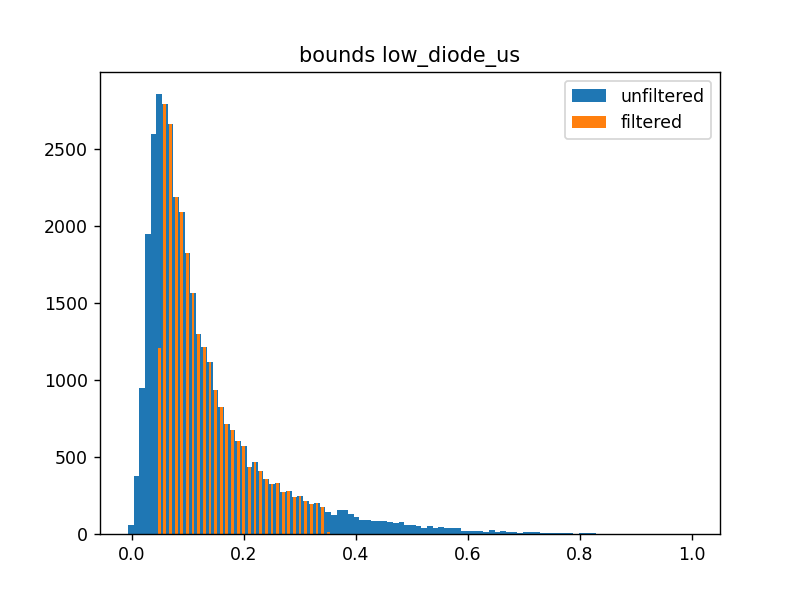

Filter0 removed 9796 unique shots out of 36233 total shots.


<IPython.core.display.Javascript object>


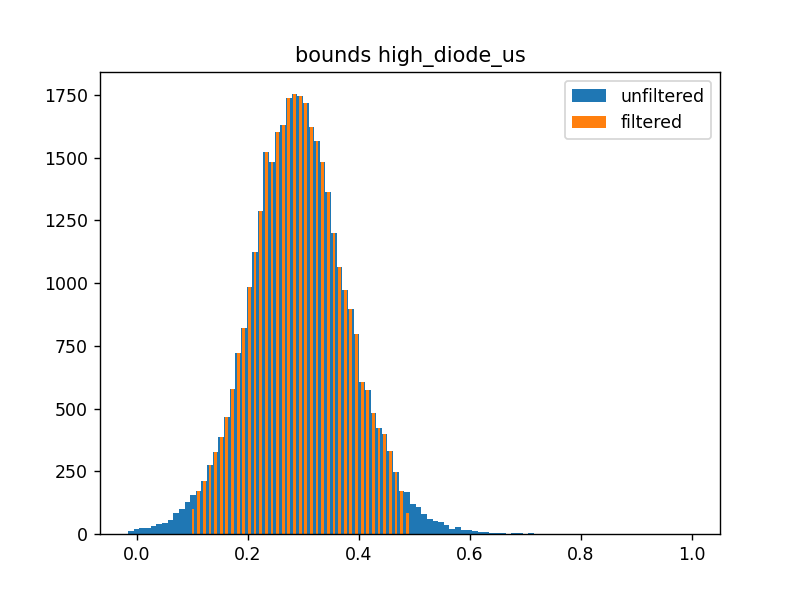

Filter1 removed 624 unique shots out of 36233 total shots.


<IPython.core.display.Javascript object>


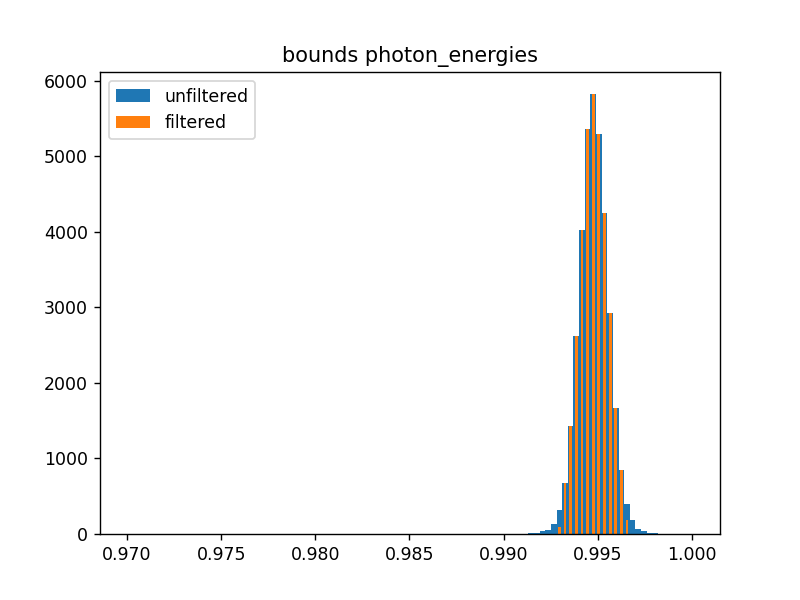

Filter2 removed 430 unique shots out of 36233 total shots.


<IPython.core.display.Javascript object>


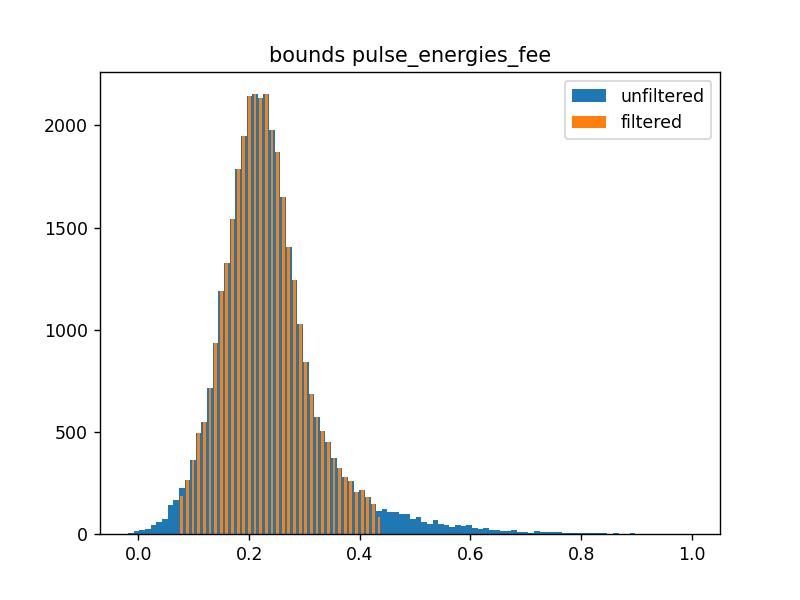

Filter3 removed 54 unique shots out of 36233 total shots.


<IPython.core.display.Javascript object>


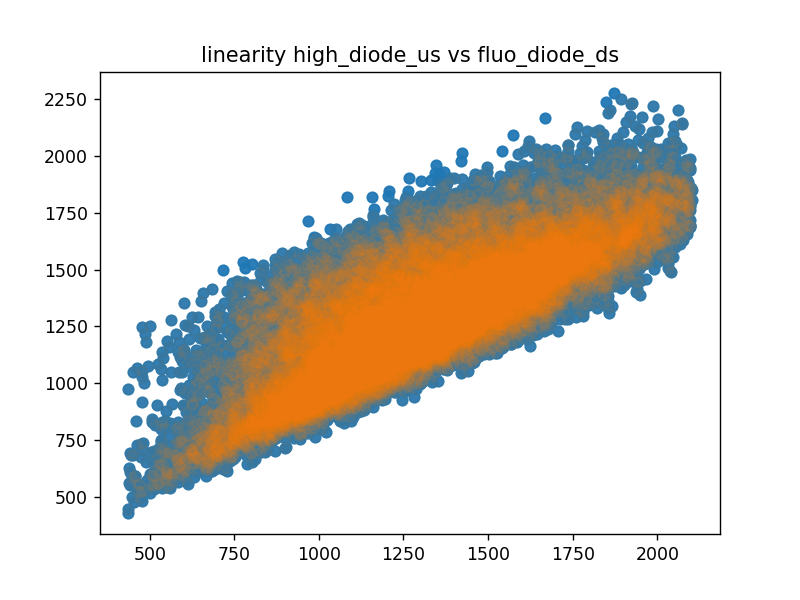

Filter4 removed 28 unique shots out of 36233 total shots.


<IPython.core.display.Javascript object>


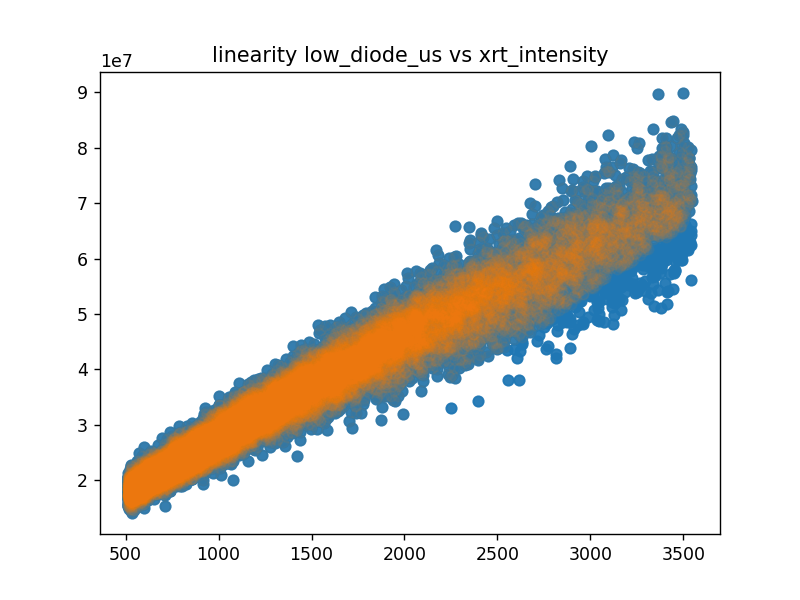

Filter5 removed 216 unique shots out of 36233 total shots.
The combined filters removed 11148 shots out of 36233 total shots | 30.768 %

Bounds filters removed 10904 shots out of 36233 total shots.
Linearity filters removed 244 shots out of 36233 total shots.
The combined filters removed 11148 shots out of 36233 total shots | 30.768 %

Filter info for run_201:

Bounds filters removed 10462 shots out of 36199 total shots.
Linearity filters removed 578 shots out of 36199 total shots.
The combined filters removed 11040 shots out of 36199 total shots | 30.498 %

Filter info for run_202:

Bounds filters removed 8814 shots out of 34264 total shots.
Linearity filters removed 852 shots out of 34264 total shots.
The combined filters removed 9666 shots out of 34264 total shots | 28.21 %

Filter info for run_203:

Bounds filters removed 10372 shots out of 34387 total shots.
Linearity filters removed 724 shots out of 34387 total shots.
The combined filters removed 11096 shots out of 34387 total sh

In [494]:
# Inputs for filters
# filters = [filter0,filter1, ...,filterN]

            # filterX[0] = On/Off # True or False
            # filterX[1] = Type # 'bounds','linearity','rms'
            # filterX[2] = [par0,par1,...,parN]
            
                # If Type = 'bounds'    # par0 = 'key_0' # key_X is string from raw_data.getKeys()
                                        # par1 = lower bound # check raw_data.keyX for starting point 
                                        # par2 = upper bound # 'None' if no upper bound
                                        # par3 = number of stds from median allowed
            
                # If Type = 'linearity' # par0 = 'key_0','key_1' # key_0 and key_1 and x and y values, respectively
                                        # par1 = width of filter
                                        # par2 = force fit through origin? # True or False
                    
# filterX[3] = [in_1, in_2]
                # in_1 = On/Off # True or false
                # in_2 = plot_one # The run you want to see plots for. Declared above in the 2nd block.

# print(raw_data.getKeys()) 
plot_one = 200
# plot_one = 68
# plot_one = 76



suspress_output = False
filt0 = [True,'bounds',['low_diode_us',0.05,'None',2.2],[True,plot_one]]
filt1 = [True,'bounds',['high_diode_us',0.1,'None',2.2],[True,plot_one]]
filt2 = [True,'bounds',['photon_energies',0.945,'None',2.2],[True,plot_one]]
filt3 = [True,'bounds',['pulse_energies_fee',0.075,'None',2.2],[True,plot_one]]

# The linearity filters create their fit based on data points that make it through
# the bounds filters.

# filt4 = [True,'linearity',['xrt_intensity','epix_intensity',0.08,True],[True,plot_one]]
filt5 = [True,'linearity',['high_diode_us','fluo_diode_ds',0.13,False],[True,plot_one]]
filt6 = [True,'linearity',['low_diode_us','xrt_intensity',0.09,True],[True,plot_one]]
# filt7 = [True,'linearity',['low_diode_us','epix_intensity',0.2,True],[True,plot_one]]


filters = [filt0,filt1,filt2,filt3,filt5,filt6]
# filters = [filt0,filt1,filt2,filt3,filt4,filt5,filt6]
# filters = [filt0,filt1,filt2,filt3,filt4,filt6,filt7]


conditions = [Filters.filtering(raw_datas[i],filters,suspress_output) for i in range(0,len(raw_datas))]

In [495]:
# Make or load processed data
make_pro = True
pro_datas = []
probe_run = [166,make_pro]
scaling = True # True = 'avg(x)/avg(y)'| False =  'avg(x/y)' 
                        ## THIS ONE ###

for i in range(0,len(raw_datas)):
    if make_pro:
        if probe_run[1]:
            new_scale = raw_datas[runs.index(probe_run[0])].make_pro_data(conditions[runs.index(probe_run[0])],filters)
            probe_run,spec_scale = new_scale.scale_spectrometers(probe_run,scaling)
        processed_data = raw_datas[i].make_pro_data(conditions[i],filters)
        pro_datas = pro_datas + [processed_data]
    else:
        if os.path.exists(raw_datas[i].save_dir + raw_datas[i].scan_name + "/" + "pro_data.pkl"):
            with open(raw_datas[i].save_dir + raw_datas[i].scan_name + "/" + "pro_data.pkl", "rb") as f:
                processed_data = pickle.load(f)
                pro_datas = pro_datas + [processed_data]
                print('Loaded processed_data for run ' + processed_data.scan_name)
        else:
            print('You are trying to load a file that does not exist.')
        
    pro_datas[i].scale_spectrometers(probe_run,scaling)

len(pro_datas)

# probe_run = [26,True]
# probe_run = pro_datas[-1].scale_spectrometers(probe_run)

[166, True]
New spec scaling made from run_166

[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]
[166, False]


30

In [ ]:
# Enter runs to plot averages
all_shots = True
check_dim = True #print length of all epix and xrt shots and shot id. should be =

plot_stacked = True #plots average of Epix and average of XRT
plot_residual = True
plot_deltaT_T = True
plot_bootstrap = False
shot_by_shot = True
boot = 50 
fraction = 1/4
plot_type = 'DeltaT/T' #enter type of plot for bootlegging: 'stacked','residual', or'DeltaT/T'

scans_to_average = [115,117,120]
input_vars = [scans_to_average,all_shots,runs,boot,fraction,plot_type,plot_stacked,plot_residual,plot_deltaT_T, plot_bootstrap,check_dim,shot_by_shot]
plot_average.plot_average(pro_datas,input_vars)

In [ ]:
#Plot comparison of residuals and deltaT/T for multiple runs

energy = pro_datas[0].epix_energy_windowed
scans_to_plot = [170,172,174]
idx = np.searchsorted(runs,scans_to_plot)

compare_resid = True
compare_deltaT_T = True

plot_average.plot_comparison(pro_datas,scans_to_plot,runs,energy,compare_resid,compare_deltaT_T)
    


In [ ]:
test = [[150],[154],[155]]
idx = [np.searchsorted(runs,test[i]) for i in range(0,len(test))] # runs
labels = '0fs','5fs','10fs','15fs'
for j in range(0,len(idx)):
    plt.figure()
    for i in idx[j]:
        _, bins, _ = plt.hist(pro_datas[i]., 100,rwidth=.75,alpha = 0.7)
        plt.legend()
    plt.xlabel('Intensity of Fluoresence Diode')
    plt.ylabel('# shots')
    plt.show()

In [ ]:
test = [[171],[173],[175]]
idx = [np.searchsorted(runs,test[i]) for i in range(0,len(test))] # runs
labels = '0fs','5fs','10fs','15fs'

fig,ax = plt.subplots()
for i in idx:
    ax.scatter(raw_datas[i].fluo_diode_ds,raw_datas[i].high_diode_us,label='unfiltered')
#         plt.scatter(pro_datas[i].fluo_diode_ds,pro_datas[i].high_diode_us,alpha=0.5,label='filtered')
    plt.legend()
    plt.title(test[j])
    plt.xlabel('Downstream Fluoresence Diode')
    plt.ylabel('Upstream Pump Diode')
    plt.show()

In [ ]:
set_0 = [170]
set_1 = [171]
scans_to_plot = set_0,set_1

scale_runs = [[166,167]]
# if type(scans_to_plot) is list:
#     scans_to_plot = np.asarray(scans_to_plot)[np.newaxis,:]
# runs = np.append(np.concatenate(scale_runs),np.concatenate(scans_to_plot))
# runs = runs.tolist()

energy = pro_datas[0].epix_energy_windowed

shots_in_scale = plot_average.gather_shots(pro_datas,[scale_runs,1,runs])
scale = np.mean(np.mean(shots_in_scale[1],0),0)/np.mean(np.mean(shots_in_scale[0],0),0)

compare = np.asarray(plot_average.gather_shots(pro_datas,[scans_to_plot,1,runs]))
epix_means = [np.mean(compare[1][i],0) for i in range(0,compare[0].shape[0])]
xrt_means = [np.mean(scale*compare[0][i],0) for i in range(0,compare[0].shape[0])]

resid_means =[epix_means[i]-xrt_means[i] for i in range(0,compare[0].shape[0])]
deltaT_T_means =[(resid_means[i]/xrt_means[i]) for i in range(0,compare[0].shape[0])]

resid_sbs = [compare[1][i]-(scale*compare[0][i]) for i in range(0,compare[0].shape[0])]
deltaT_T_sbs = [(resid_sbs[i])/(scale*compare[0][i]) for i in range(0,compare[0].shape[0])]


plt.figure()
plt.plot(energy[0:60],deltaT_T_means[0][0:60])
plt.plot(energy[0:60],deltaT_T_means[1][0:60])

plt.legend
plt.title('DeltaT/T avg(170,172,174)-avg(171,173) ')
plt.xlabel('energy, keV')
# plt.show()


(3,)
(3,)
-0.00023943387990170664 3.198088318211866


<IPython.core.display.Javascript object>


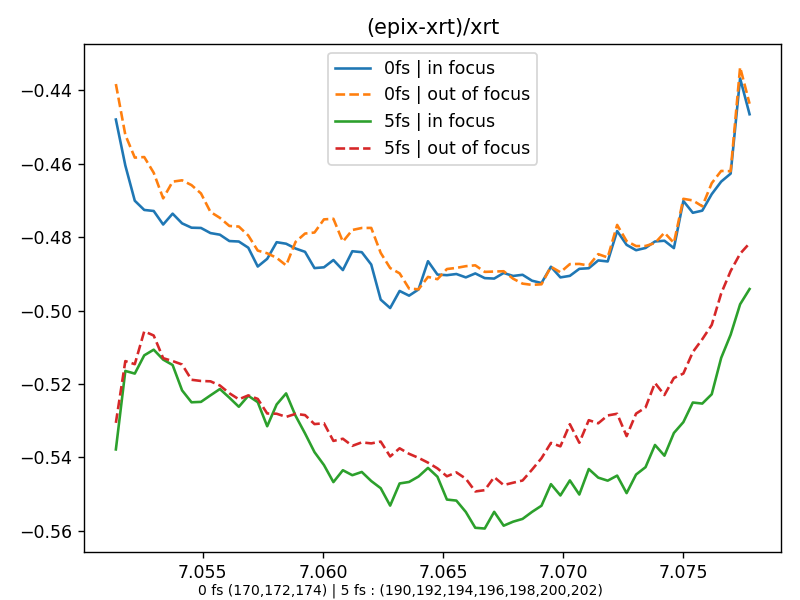

['run_190' array([    0,     4,     5, ..., 37280, 37281, 37282])
 'run_192' array([    0,     3,     5, ..., 35939, 35940, 35941])
 'run_194' array([    0,     1,     2, ..., 35644, 35645, 35647])
 'run_196' array([    0,     1,     2, ..., 35670, 35671, 35672])
 'run_198' array([    0,     1,     2, ..., 37175, 37178, 37179])
 'run_200' array([    0,     1,     2, ..., 37940, 37941, 37942])
 'run_202' array([    0,     1,     2, ..., 36962, 36963, 36964])
 'run_191' array([    0,     1,     3, ..., 35730, 35733, 35734])
 'run_193' array([    0,     1,     2, ..., 36661, 36662, 36663])
 'run_195' array([    0,     3,     4, ..., 36471, 36472, 36473])
 'run_197' array([    1,     2,     6, ..., 35525, 35527, 35528])
 'run_199' array([    0,     1,     2, ..., 38587, 38589, 38593])
 'run_201' array([    0,     2,     3, ..., 37463, 37464, 37465])
 'run_203' array([    0,     2,     4, ..., 36468, 36472, 36474])]


In [496]:
energy = pro_datas[0].epix_energy_windowed
set_0 = [170,172,174,184,186,188]           
set_3 = [171,173,175,185,187,189]
# set_3 = [137,139,141]
# set_4 = [124,126,128]
# set_5 = [123,125,127]
# set_6 = [129,131,133]
# set_7 = [130,132,135]
# sets = [set_0,set_1,set_2,set_3,set_4,set_5,set_6,set_7]

sets = set_0,set_3
scale_runs = [[166,167]]
scale_shots = plot_average.gather_shots(pro_datas,[scale_runs,1,runs])
scale = np.mean(np.mean(scale_shots[1],0),0)/np.mean(np.mean(scale_shots[0],0),0)
# input_vars = [scans_to_average,all_shots,runs]
# all_xrt_shots,all_epix_shots,all_xrt_shots_based,shot_id

compare = np.asarray(plot_average.gather_shots(pro_datas,[sets,1,runs]))
# compare = [water,runs1,runs2,...,runsN]
print(compare.shape)
epix_means = [np.mean(compare[1][i],0) for i in range(0,compare[0].shape[0])]
xrt_means = [scale*np.mean(compare[0][i],0) for i in range(0,compare[0].shape[0])]

# resid_means_epix =[epix_means[i]-epix_means[0] for i in range(0,compare[0].shape[0])]
# deltaT_T_means_epix= [(resid_means_epix[i]/epix_means[0]) for i in range(compare[0].shape[0])]

# resid_means_xrt =[xrt_means[i]-xrt_means[0] for i in range(0,compare[0].shape[0])]
# deltaT_T_means_xrt =[(resid_means_xrt[i]/xrt_means[0]) for i in range(0,compare[0].shape[0])]

resid_means_both =[epix_means[i]-xrt_means[i] for i in range(0,compare[0].shape[0])]
deltaT_T_means_both =[(resid_means_both[i]/xrt_means[i]) for i in range(0,compare[0].shape[0])]



set_1 = [190,192,194,196,198,200,202]
set_2 = [191,193,195,197,199,201,203]


sets = set_1,set_2
scale_runs = [[206,207]]
scale_shots = plot_average.gather_shots(pro_datas,[scale_runs,1,runs])
scale = np.mean(np.mean(scale_shots[1],0),0)/np.mean(np.mean(scale_shots[0],0),0)
compare = np.asarray(plot_average.gather_shots(pro_datas,[sets,1,runs]))
print(compare.shape)
epix_means = [np.mean(compare[1][i],0) for i in range(0,compare[0].shape[0])]
xrt_means = [scale*np.mean(compare[0][i],0) for i in range(0,compare[0].shape[0])]
resid_means_both =[epix_means[i]-xrt_means[i] for i in range(0,compare[0].shape[0])]
deltaT_T_means_both_2 =[(resid_means_both[i]/xrt_means[i]) for i in range(0,compare[0].shape[0])]


















# plt.figure()
# [plt.plot(energy,deltaT_T_means_epix[i]) for i in range(0,len(deltaT_T_means_epix))]
# plt.legend((sets[1:]))
# plt.title('(Epix_sample-Epix_water)/Epix_water')
# plt.xlabel('energy, keV')

# plt.figure()
# [plt.plot(energy,deltaT_T_means_xrt[i]) for i in range(0,len(deltaT_T_means_xrt))]
# plt.legend((sets[1:]))
# plt.title('(xrt_sample-xrt_water)/xrt_water')
# plt.xlabel('energy, keV')
# plt.show()
# [print(compare[2][i][:]) for i in range(0,compare[0].shape[0])]

x=[7055.0,7065.0,7075.0]
y=[1/0.662740,1/0.66380,1/0.66485]

m,b = np.polyfit(x,y,1)
print(m,b)


plt.figure()
# [plt.plot(energy,deltaT_T_means_both[i]) for i in range(0,len(deltaT_T_means_both))]
plt.plot(energy,deltaT_T_means_both[0],label = '0fs | in focus')
plt.plot(energy,deltaT_T_means_both[1],label = '0fs | out of focus',linestyle='dashed')

plt.plot(energy,deltaT_T_means_both_2[0],label = '5fs | in focus')
plt.plot(energy,deltaT_T_means_both_2[1],label = '5fs | out of focus',linestyle='dashed')

plt.legend()

plt.title('(epix-xrt)/xrt')
txt = ('0 fs (170,172,174) | 5 fs : (190,192,194,196,198,200,202)')
plt.figtext(0.5, 0.01, txt, wrap=False, horizontalalignment='center', fontsize=8)
plt.tight_layout()
# plt.legend(('0 fs','10 fs'))
# plt.title('(epix-xrt)/xrt | out of focus')

# plt.xlabel('energy, keV')
# plt.show()

# plt.figure()
# [plt.plot(energy,epix_means[i]) for i in range(0,len(epix_means))]
# plt.legend((sets))
# plt.title('epix')
# plt.xlabel('energy, keV')
# plt.show()

# plt.figure()
# plt.legend((sets))
# [plt.plot(energy,xrt_means[i]) for i in range(0,len(xrt_means))]
# plt.title('xrt')
# plt.xlabel('energy, keV')
# plt.show()

# plt.figure()
# idx = np.searchsorted(runs,[68,50,75]) # runs

# [plt.scatter(pro_datas[i].fluo_diode_ds,pro_datas[i].high_diode_us) for i in idx]
# plt.xlabel('fluo_diode')
# plt.ylabel('pump_diode')
# plt.legend(('water','sample, normal','sample, foil'))
print(compare[2][:])


In [ ]:
energy = pro_datas[0].epix_energy_windowed
sets = [[110,111,112],[115,117,120],[116,119,121]]
# input_vars = [scans_to_average,all_shots,runs]
# all_xrt_shots,all_epix_shots,all_xrt_shots_based,shot_id
compare = [plot_average.gather_shots(pro_datas,[sets[i],0,runs]) for i in range(0,len(sets))]
# compare = [water,r72,r73,r74,sample]

epix_means = [np.mean(compare[i][1],0) for i in range(0,len(compare))]
xrt_means = [np.mean(compare[i][2],0) for i in range(0,len(compare))]
# epix_means = [epix_means[0],epix_means[1],epix_means[2]]
resid_means_epix =[epix_means[i]-epix_means[0] for i in range(0,len(compare))]
deltaT_T_means_epix= [(resid_means_epix[i]/epix_means[0]) for i in range(0,len(compare))]

resid_means_xrt =[xrt_means[i]-xrt_means[0] for i in range(0,len(compare))]
deltaT_T_means_xrt =[(resid_means_xrt[i]/xrt_means[0]) for i in range(0,len(compare))]

resid_means_both =[epix_means[i]-xrt_means[i] for i in range(0,len(compare))]
deltaT_T_means_both =[(resid_means_both[i]/xrt_means[i]) for i in range(0,len(compare))]


In [ ]:
energy = pro_datas[0].epix_energy_windowed

epix_water_mean = np.mean(water[1],0)
epix_sample_mean = np.mean(sample[1],0)

xrt_water_mean = np.mean(water[0],0)
xrt_sample_mean = np.mean(sample[0],0)
scale = np.max(epix_water_mean)/np.max(xrt_water_mean)
#################

epix_resid_means = epix_sample_mean-epix_water_mean
epix_DeltaT_T_means = epix_resid_means/epix_water_mean

xrt_resid_means = xrt_sample_mean-xrt_water_mean
xrt_DeltaT_T_means = xrt_resid_means/xrt_water_mean

#################

both_resid_sample_sbs = sample[1]-sample[0]*scale
both_DeltaT_T_sample_sbs = both_resid_sample/sample[0]*scale

both_resid_water_sbs = water[1]-water[0]*scale
both_DeltaT_T_water_sbs = both_resid_water/water[0]*scale
both_DeltaT_T_sample = np.mean(both_DeltaT_T_sample_sbs,0)
both_DeltaT_T_water = np.mean(both_DeltaT_T_water_sbs,0)
#################

plt.figure()
plt.plot(energy[0:70],epix_DeltaT_T_means)
plt.title('DeltaT_T : (Epix_sample-Epix_water)/Epix_water')
plt.xlabel('energy, keV')
print(water[1].shape)
print(sample[1].shape)

plt.figure()
plt.plot(energy[0:70],xrt_DeltaT_T_means)
plt.title('DeltaT_T : (XRT_sample-XRT_water)/xrt_water')
plt.xlabel('energy, keV')
print(water[1].shape)
print(sample[1].shape)

plt.figure()
plt.plot(energy[0:70],both_DeltaT_T_sample,label='sample')
plt.plot(energy[0:70],both_DeltaT_T_water,label='water',alpha=0.6,linestyle='dashed')

plt.title('DeltaT_T : (XRT_sample-XRT_water)/xrt_water')
plt.xlabel('energy, keV')
print(water[1].shape)
print(sample[1].shape)

In [ ]:
compare[1][4]

In [ ]:
plt.figure()
plt.

In [ ]:
plot_type = 'DeltaT/T'
boot = 100
fraction = 1/5
if type(boot)==int:
    plt.figure()
    for j in range(1,len(compare)):
        for i in range(0,boot):
            if j is 1:
                color = 'k'
            if j is 2:
                color = 'b'
            if j is 3:
                color = 'g'
            if j is 4:
                color = 'c'
            rand_=np.random.choice(len(compare[j][1]), np.int64(len(compare[2][1])*fraction), replace=False)
            rand_shots_epix = np.mean(compare[j][1][rand_],0)
            rand_shots_xrt = np.mean(scale*compare[j][0][rand_],0)
            rand_shots_residual = rand_shots_epix-rand_shots_xrt
            rand_shots_DeltaT_T = rand_shots_residual/rand_shots_xrt
            if plot_type == 'stacked':
                plt.plot(energy,rand_shots_epix)
                plt.plot(energy,rand_shots_xrt,linestyle='dashed',alpha=0.6)
            if plot_type == 'residual':
                plt.plot(energy,rand_shots_residual)
            if plot_type == 'DeltaT/T':
                plt.plot(energy,rand_shots_DeltaT_T,color)
plt.legend((sets[1:]))
plt.title('(epix-xrt)/xrt| 100 loop bootstrap')
plt.xlabel('energy, keV')

In [ ]:
plt.figure()
plt.plot(energy,(0.66*epix_means[1]-xrt_means[1])/xrt_means[1])
plt.plot(energy,0.1375+(epix_means[2]-xrt_means[2])/xrt_means[2])
plt.title('(epix-xrt)/xrt')
plt.legend('[154,155]','156')
plt.xlabel('energy, keV')
plt.ylabel('Delta T / T')


var1=epix_means[1]
var2=epix_means[2]/0.66

plt.figure()
plt.plot(energy,var1)
plt.plot(energy,var2)

In [ ]:
numerator = np.mean(pro_datas[0].xrt_norm,0)*(np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_based_norm,0))
denomenator = (np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_norm,0))*np.mean(pro_datas[0].xrt_based_norm,0)
alpha = numerator/denomenator
plt.figure()
plt.plot(energy,alpha*(np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_norm,0))/np.mean(pro_datas[0].xrt_norm,0))
plt.plot(energy,(np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_based_norm,0))/np.mean(pro_datas[0].xrt_based_norm,0))

In [ ]:
r1 = (np.mean(pro_datas[1].epix_norm,0)-np.mean(pro_datas[1].xrt_norm,0))/np.mean(pro_datas[1].xrt_norm,0)
r2 = (0.66*np.mean(pro_datas[5].epix_norm,0)-np.mean(pro_datas[5].xrt_norm,0))/np.mean(pro_datas[5].xrt_norm,0)
r3 = (np.mean(pro_datas[6].epix_norm,0)-np.mean(pro_datas[6].xrt_norm,0))/np.mean(pro_datas[6].xrt_norm,0)
rn = (np.mean(pro_datas[0].epix_windowed,0)-np.mean(pro_datas[0].xrt_norm,0))/np.mean(pro_datas[0].xrt_norm,0)
num1 = (np.mean(pro_datas[1].epix_norm,0)-np.mean(pro_datas[1].xrt_based_norm,0))/np.mean(pro_datas[1].xrt_based_norm,0)
num2 = (0.66*np.mean(pro_datas[5].epix_norm,0)-np.mean(pro_datas[5].xrt_based_norm,0))/np.mean(pro_datas[5].xrt_based_norm,0)
num3 = (np.mean(pro_datas[6].epix_norm,0)-np.mean(pro_datas[6].xrt_based_norm,0))/np.mean(pro_datas[6].xrt_based_norm,0)
den = (np.mean(pro_datas[0].epix_norm,0)-np.mean(pro_datas[0].xrt_based_norm,0))/np.mean(pro_datas[0].xrt_based_norm,0)
plt.figure()
plt.plot(energy,0.117+num3)
plt.plot(energy,num2)

plt.figure()
plt.plot(energy,0.00375+r3)
plt.plot(energy,r2)

<IPython.core.display.Javascript object>


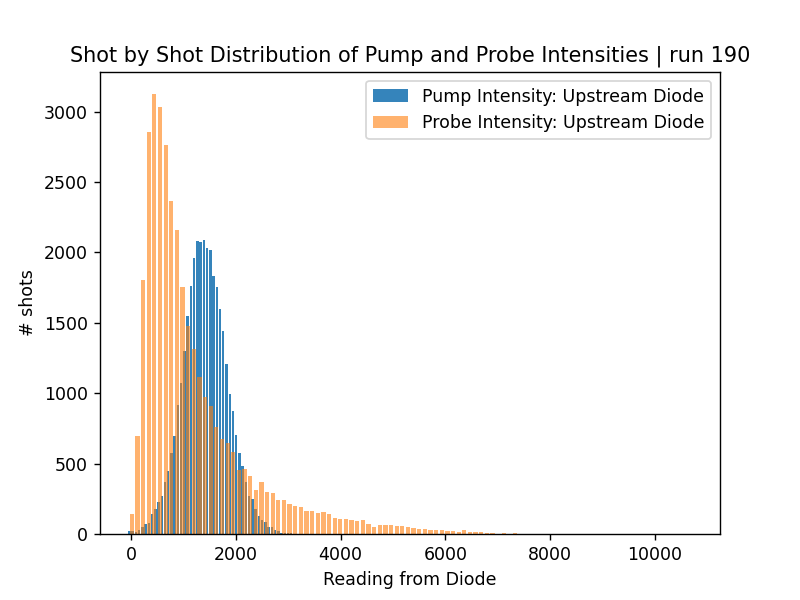

In [448]:
plt.figure()
_, bins, _ = plt.hist(raw_datas[2].high_diode_us, 100,rwidth=.75,alpha = 0.9,label='Pump Intensity: Upstream Diode')
plt.hist(raw_datas[2].low_diode_us, 100,rwidth=.75,alpha = 0.6,label='Probe Intensity: Upstream Diode')
plt.legend()
plt.xlabel('Reading from Diode')
plt.title('Shot by Shot Distribution of Pump and Probe Intensities | run 190')
plt.ylabel('# shots')
plt.show()